In [9]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, bkg, color

In [2]:
bands = ['F106', 'F129', 'F184']
arrays = []

sample = SampleStrongLens()
for band in bands:
    arrays.append(sample.get_array(num_pix=45, side=4.95, band=band))

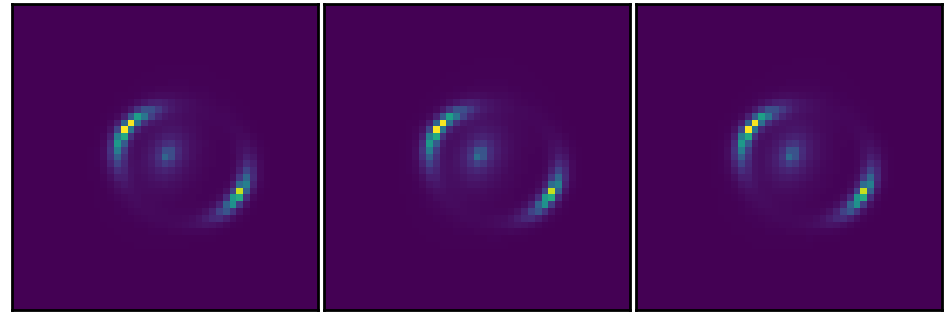

In [3]:
plot.plot_list(arrays)

In [4]:
backgrounds = bkg.get_high_galactic_lat_bkg(arrays[0].shape, bands, seed=42)

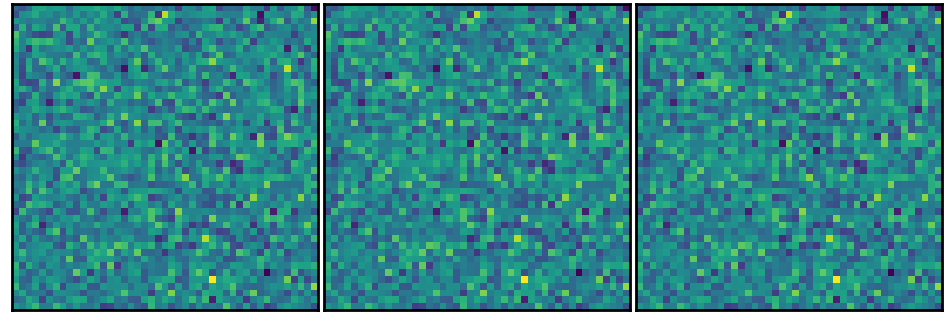

In [5]:
plot.plot_list(backgrounds)

In [7]:
for i, background in enumerate(backgrounds):
    arrays[i] += background

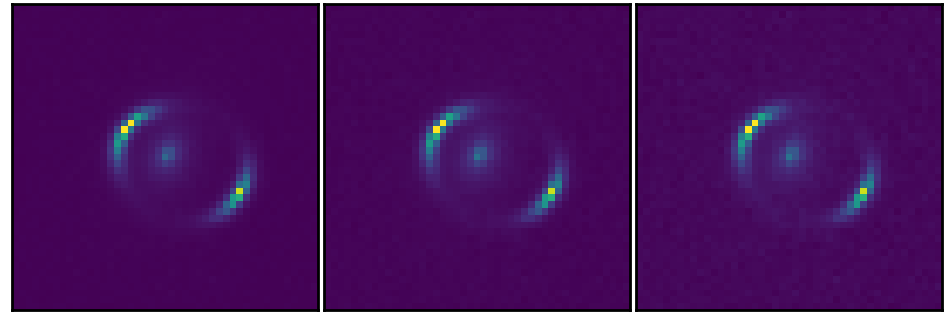

In [8]:
plot.plot_list(arrays)

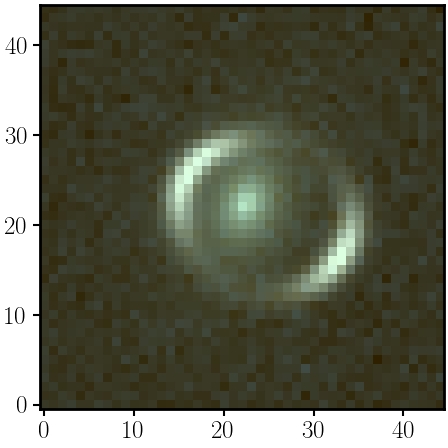

In [10]:
rgb = color.get_rgb(arrays[2], arrays[1], arrays[0])
plot.plot(rgb)